## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import bs4
import spacy
import re
from bs4 import BeautifulSoup
import unicodedata

In [2]:
df=pd.read_csv("../Data/train.csv")
df

,mail,type
0,"On Sun, 11 Aug 2002 bitbitch@magnesium.net wro...",Safe Email
1,hello all : please send an email to : ibuyit @...,Safe Email
2,"idioms content - length : 99 please send "" app...",Safe Email
3,re : work from home this is one time message ....,Phishing Email
4,test results - resend by december 14 th the su...,Phishing Email
...,...,...
14915,ask for it bait - excelled @ em . ca - thousan...,Phishing Email
14916,a computer and internet connection for you and...,Safe Email
14917,first israeli seminar on computational linguis...,Safe Email
14918,enrononline weekly public report for november ...,Safe Email


In [3]:
df['type'].value_counts()

type
Safe Email        9058
Phishing Email    5862
Name: count, dtype: int64

## Eda On Mail Column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14920 entries, 0 to 14919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mail    14909 non-null  object
 1   type    14920 non-null  object
dtypes: object(2)
memory usage: 233.3+ KB


## Histogram on total dataset

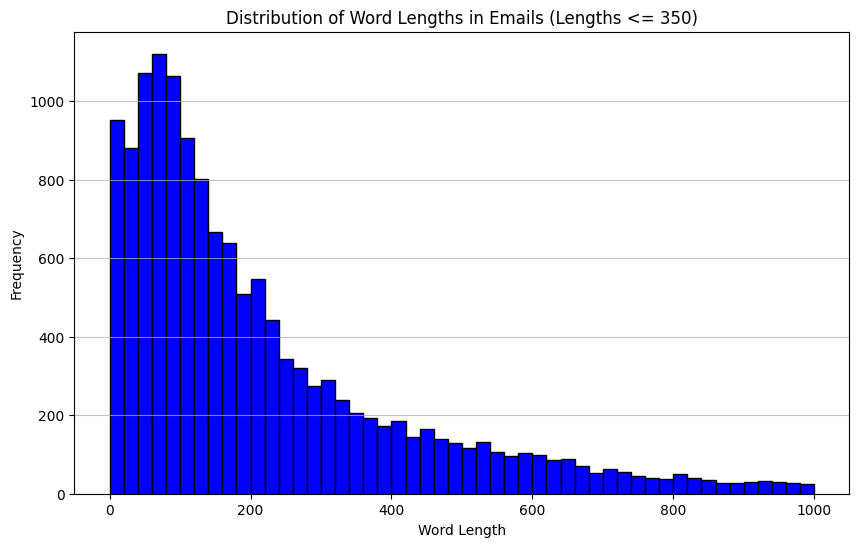

In [5]:
df['word_length'] = df['mail'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
filtered_df = df[df['word_length'] <= 1000]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['word_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Word Lengths in Emails (Lengths <= 350)')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
df['word_length'].describe()

count    1.492000e+04
mean     5.800428e+02
std      2.888706e+04
min      0.000000e+00
25%      7.400000e+01
50%      1.590000e+02
75%      3.502500e+02
max      3.527576e+06
Name: word_length, dtype: float64

In [8]:
filtered_df

,mail,type,word_length
0,"On Sun, 11 Aug 2002 bitbitch@magnesium.net wro...",Safe Email,111
1,hello all : please send an email to : ibuyit @...,Safe Email,531
2,"idioms content - length : 99 please send "" app...",Safe Email,26
3,re : work from home this is one time message ....,Phishing Email,52
4,test results - resend by december 14 th the su...,Phishing Email,190
...,...,...,...
14915,ask for it bait - excelled @ em . ca - thousan...,Phishing Email,90
14916,a computer and internet connection for you and...,Safe Email,533
14917,first israeli seminar on computational linguis...,Safe Email,342
14918,enrononline weekly public report for november ...,Safe Email,312


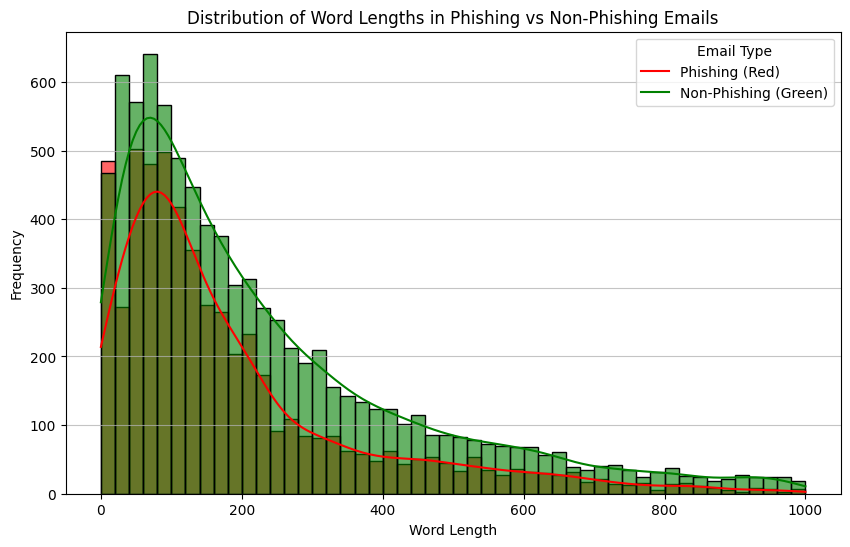

In [9]:
palette = {'Safe Email': 'green', 'Phishing Email': 'red'}

# Plot the histogram for both classes
plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_df,
    x='word_length',
    hue='type',
    bins=50,
    kde=True,
    palette=palette,
    alpha=0.6,
    hue_order=['Safe Email', 'Phishing Email']  # Ensure the order is consistent
)
plt.title('Distribution of Word Lengths in Phishing vs Non-Phishing Emails')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Add a clear legend
plt.legend(title='Email Type', labels=['Phishing (Red)','Non-Phishing (Green)'])
plt.show()

/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/2380968188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='type', y='word_length', palette=palette)


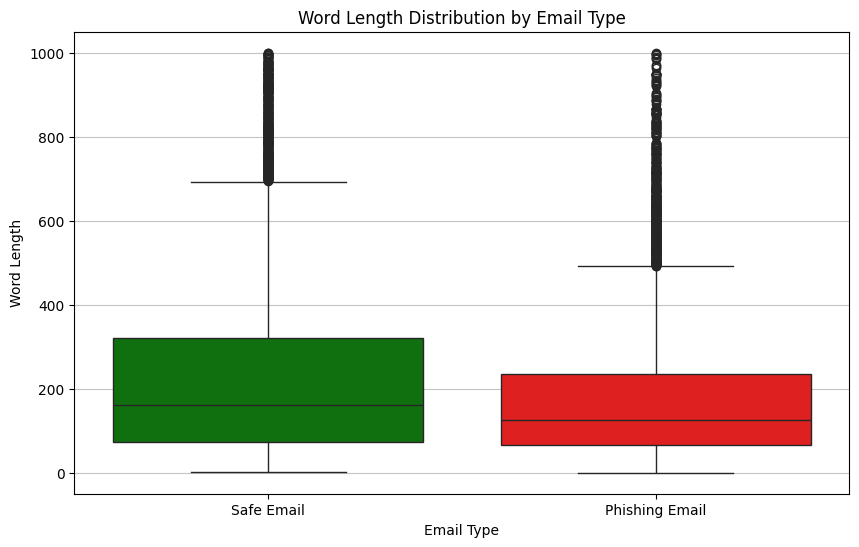

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='type', y='word_length', palette=palette)
plt.title('Word Length Distribution by Email Type')
plt.xlabel('Email Type')
plt.ylabel('Word Length')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()


# So let us analyse our text properly

In [11]:
import string
from nltk.corpus import stopwords
import nltk
# Function to count exclamation marks
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def count_exclamation(text):
    return text.count('!')

# Function to count dollar symbols
def count_dollar(text):
    return text.count('$')

# Function to count special characters (excluding ! and $ but including punctuation)
def count_special_chars(text):
    return sum(1 for char in text if not char.isalnum() and char not in ['!', '$'] and not char.isspace())

# Remove stopwords and create new features
filtered_df['clean_text'] = filtered_df['mail'].fillna('').apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words]))

# Add new features
filtered_df['dollar_count'] = filtered_df['mail'].fillna('').apply(count_dollar)
filtered_df['exclamation_count'] = filtered_df['mail'].fillna('').apply(count_exclamation)
filtered_df['special_chars_count'] = filtered_df['mail'].fillna('').apply(count_special_chars)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudhanvasavyasachi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/207092932.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clean_text'] = filtered_df['mail'].fillna('').apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words]))
/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/207092932.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [13]:
# Remove punctuation, special characters and dollars from clean_text
filtered_df['clean_text'] = filtered_df['clean_text'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/666724891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clean_text'] = filtered_df['clean_text'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))


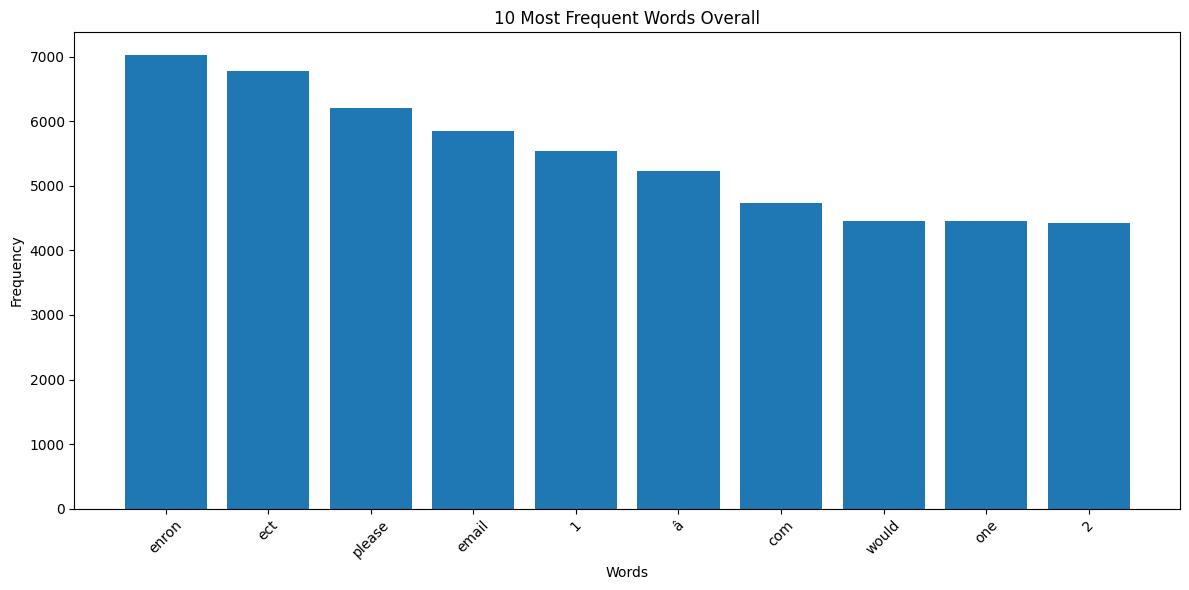

In [14]:


# Split all clean text into words and count frequencies
all_words = ' '.join(filtered_df['clean_text']).split()
word_freq = Counter(all_words)

# Get 10 most common words
most_common = dict(word_freq.most_common(10))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(most_common.keys(), most_common.values())
plt.title('10 Most Frequent Words Overall')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Now let us see for phishing mails what are the word frequencies

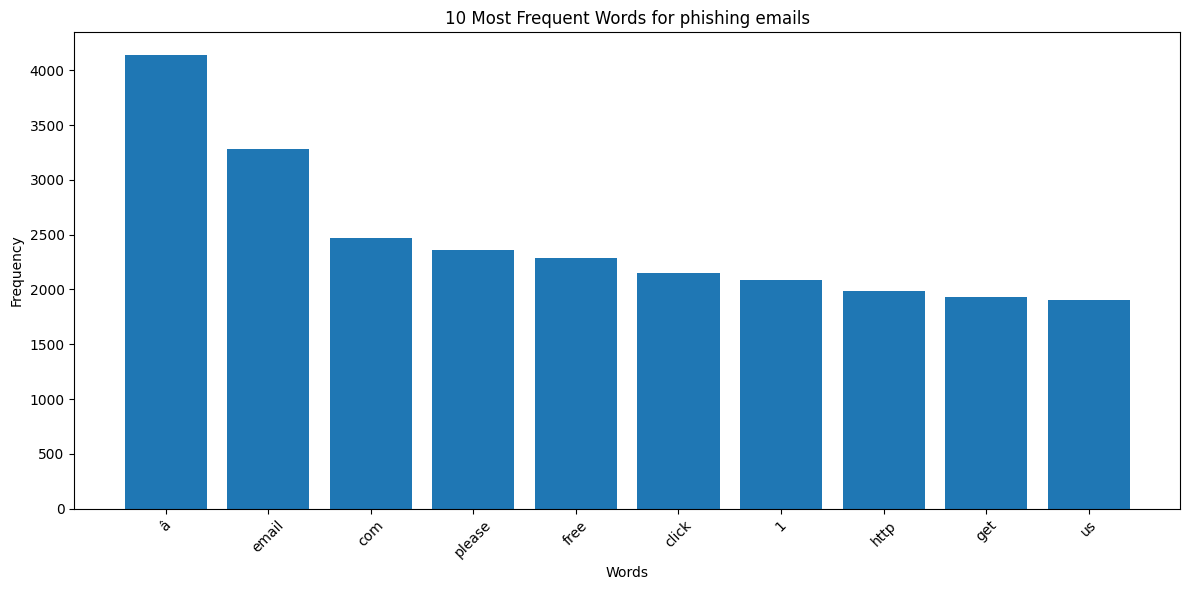

In [15]:
# Get word frequencies from clean_text
# Split all clean text into words and count frequencies
all_words = ' '.join(filtered_df[filtered_df["type"]=="Phishing Email"]['clean_text']).split()
word_freq = Counter(all_words)

# Get 10 most common words
most_common = dict(word_freq.most_common(10))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(most_common.keys(), most_common.values())
plt.title('10 Most Frequent Words for phishing emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Function to detect links
# Function to detect email addresses
def has_email(text):
    # Email pattern
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    return 1 if re.search(email_pattern, str(text)) else 0

import re
def has_link(text):
    # Common URL patterns
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    www_pattern = r'www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return 1 if re.search(url_pattern, str(text)) or re.search(www_pattern, str(text)) else 0

# Function to detect phone numbers
def has_phone(text):
    # Phone number patterns
    phone_pattern = r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{10})'
    return 1 if re.search(phone_pattern, str(text)) else 0

# Add binary columns for links and phone numbers
filtered_df['has_link'] = filtered_df['mail'].apply(has_link)
filtered_df['has_phone'] = filtered_df['mail'].apply(has_phone)
filtered_df['has_email'] = filtered_df['mail'].apply(has_email)

# Remove links, phone numbers, punctuation and special characters from clean_text
filtered_df['clean_text'] = filtered_df['clean_text'].apply(lambda x: re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', x)) # Remove email addresses
filtered_df['clean_text'] = filtered_df['clean_text'].apply(lambda x: re.sub(r'http[s]?://\S+|www\.\S+', '', x)) # Remove URLs
filtered_df['clean_text'] = filtered_df['clean_text'].apply(lambda x: re.sub(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{10})', '', x)) # Remove phone numbers
filtered_df['clean_text'] = filtered_df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # Remove punctuation and special characters


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/3397328043.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['has_link'] = filtered_df['mail'].apply(has_link)
/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/3397328043.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['has_phone'] = filtered_df['mail'].apply(has_phone)
/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/3397328043.py:24: SettingWithCopyWarning: 
A value is trying to be

In [17]:
filtered_df

,mail,type,word_length,clean_text,dollar_count,exclamation_count,special_chars_count,has_link,has_phone,has_email
0,"On Sun, 11 Aug 2002 bitbitch@magnesium.net wro...",Safe Email,111,sun 11 aug 2002 bitbitchmagnesiumnet wrote mea...,0,0,38,1,0,1
1,hello all : please send an email to : ibuyit @...,Safe Email,531,hello please send email ibuyit enron com s...,0,4,147,0,0,0
2,"idioms content - length : 99 please send "" app...",Safe Email,26,idioms content length 99 please send appala...,0,1,7,0,0,0
3,re : work from home this is one time message ....,Phishing Email,52,work home one time message received email ex...,0,0,7,0,0,0
4,test results - resend by december 14 th the su...,Phishing Email,190,test results resend december 14 th super pain...,0,1,49,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14915,ask for it bait - excelled @ em . ca - thousan...,Phishing Email,90,ask bait excelled em ca thousands availabl...,0,0,17,0,0,0
14916,a computer and internet connection for you and...,Safe Email,533,computer internet connection family know tech...,0,0,82,0,0,0
14917,first israeli seminar on computational linguis...,Safe Email,342,first israeli seminar computational linguistic...,0,0,64,0,0,0
14918,enrononline weekly public report for november ...,Safe Email,312,enrononline weekly public report november 16 ...,2,0,43,0,0,0


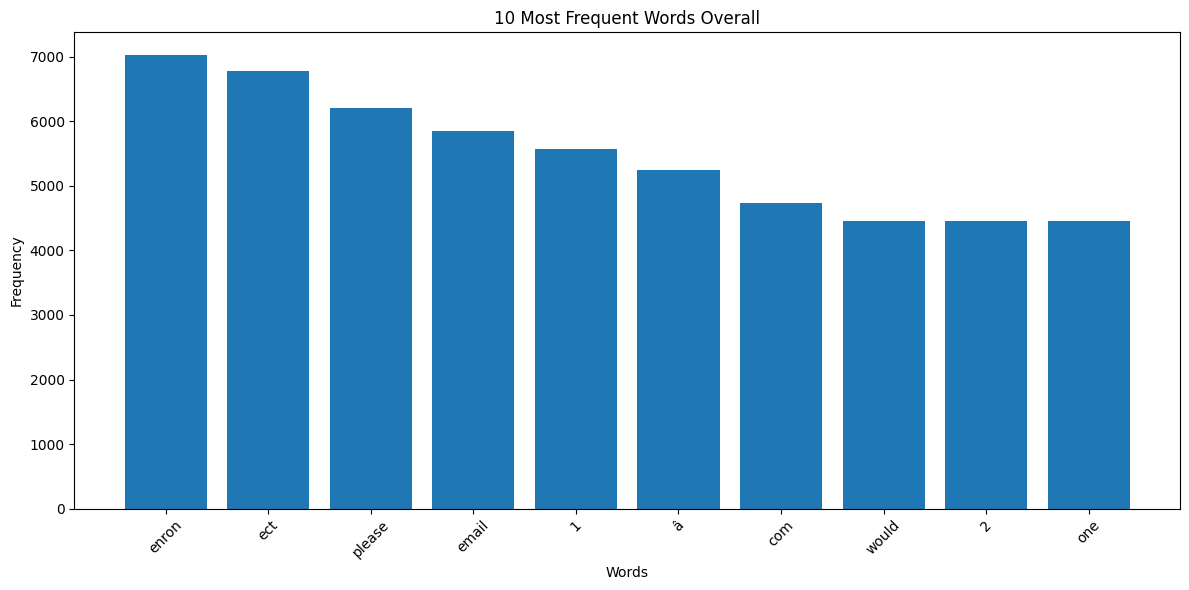

In [18]:


# Split all clean text into words and count frequencies
all_words = ' '.join(filtered_df['clean_text']).split()
word_freq = Counter(all_words)

# Get 10 most common words
most_common = dict(word_freq.most_common(10))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(most_common.keys(), most_common.values())
plt.title('10 Most Frequent Words Overall')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


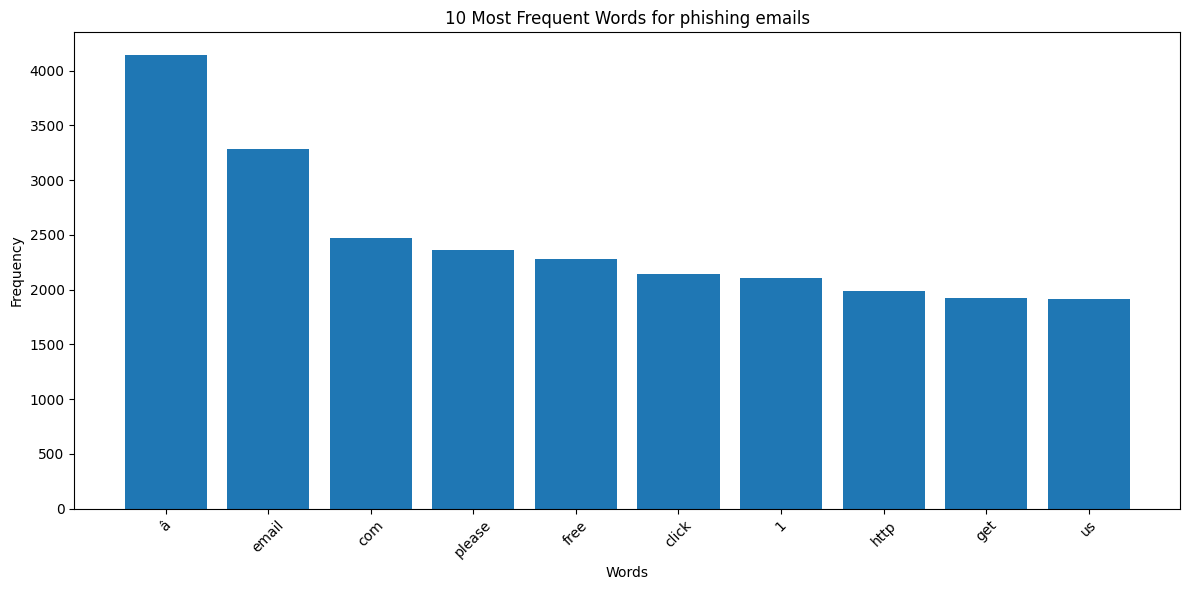

In [19]:
# Get word frequencies from clean_text
# Split all clean text into words and count frequencies
all_words = ' '.join(filtered_df[filtered_df["type"]=="Phishing Email"]['clean_text']).split()
word_freq = Counter(all_words)

# Get 10 most common words
most_common = dict(word_freq.most_common(10))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(most_common.keys(), most_common.values())
plt.title('10 Most Frequent Words for phishing emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
filtered_df["type"].value_counts()

type
Safe Email        8430
Phishing Email    5500
Name: count, dtype: int64

In [21]:
# Function to count diacritic characters
def count_diacritics(text):
    return sum(1 for char in text if unicodedata.combining(char) or 
              unicodedata.category(char).startswith('L') and unicodedata.decomposition(char))

# Add diacritic count column
filtered_df['diacritic_count'] = filtered_df['clean_text'].apply(count_diacritics)


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/2330371267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['diacritic_count'] = filtered_df['clean_text'].apply(count_diacritics)


In [22]:
filtered_df.groupby('type')['diacritic_count'].sum()

type
Phishing Email    22681
Safe Email         2496
Name: diacritic_count, dtype: int64

In [23]:
filtered_df.sample(5)

,mail,type,word_length,clean_text,dollar_count,exclamation_count,special_chars_count,has_link,has_phone,has_email,diacritic_count
4010,"Hi ladies,I setup a cron job to do a full back...",Safe Email,76,hi ladiesi setup cron job full backup tape dri...,0,0,28,1,0,1,0
323,"On Wed, Feb 06, 2002 at 04:30:18PM +0200, Harr...",Safe Email,116,wed feb 06 2002 043018pm 0200 harri haataja wr...,0,0,103,1,0,0,0
13294,"wind ppa value per your request , i will start...",Safe Email,100,wind ppa value per request start providing da...,2,0,21,0,0,0,0
12023,"i have a question about your website ? hello ,...",Phishing Email,221,question website hello name steve scott pre...,0,1,26,0,0,0,0
1115,bruceg impress your friends with your new dipl...,Phishing Email,205,bruceg impress friends new diplom get uni ...,0,5,92,0,0,0,0


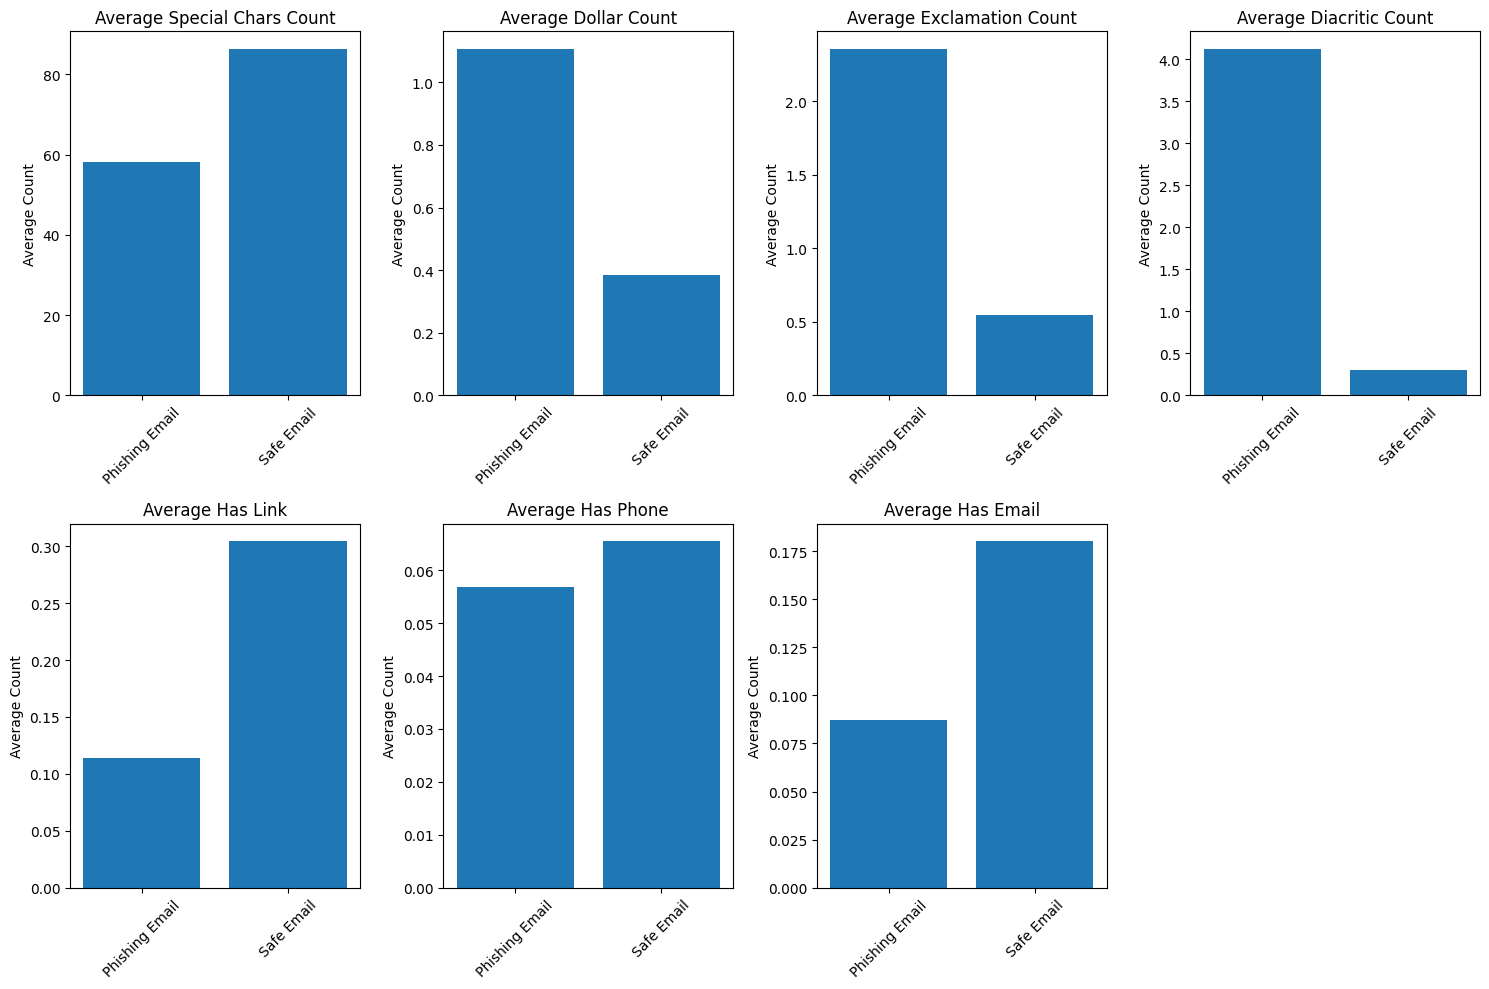

In [24]:
# Create figure with subplots
plt.figure(figsize=(15, 10))

# List of features to plot
features = ['special_chars_count', 'dollar_count', 'exclamation_count', 
           'diacritic_count', 'has_link', 'has_phone', 'has_email']

# Create 2x4 subplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    
    # Calculate mean values for each type
    means = filtered_df.groupby('type')[feature].mean()
    
    # Create bar plot
    plt.bar(means.index, means.values)
    plt.title(f'Average {feature.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.ylabel('Average Count')

plt.tight_layout()
plt.show()


let us unserstand wheather the sentiment of the mail plays a role

In [25]:
from textblob import TextBlob

# Add polarity column using TextBlob
filtered_df['polarity'] = filtered_df['mail'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/1709756144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['polarity'] = filtered_df['mail'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [26]:
filtered_df.head(10)

,mail,type,word_length,clean_text,dollar_count,exclamation_count,special_chars_count,has_link,has_phone,has_email,diacritic_count,polarity
0,"On Sun, 11 Aug 2002 bitbitch@magnesium.net wro...",Safe Email,111,sun 11 aug 2002 bitbitchmagnesiumnet wrote mea...,0,0,38,1,0,1,0,0.068750
1,hello all : please send an email to : ibuyit @...,Safe Email,531,hello please send email ibuyit enron com s...,0,4,147,0,0,0,0,0.128116
2,"idioms content - length : 99 please send "" app...",Safe Email,26,idioms content length 99 please send appala...,0,1,7,0,0,0,0,0.250000
3,re : work from home this is one time message ....,Phishing Email,52,work home one time message received email ex...,0,0,7,0,0,0,0,0.000000
4,test results - resend by december 14 th the su...,Phishing Email,190,test results resend december 14 th super pain...,0,1,49,0,0,0,0,0.102778
5,sociolinguistics michael g . smith language an...,Safe Email,495,sociolinguistics michael g smith language pow...,1,0,147,0,1,0,0,0.075450
6,enron in action 11 . 06 . 00 holiday shopping ...,Safe Email,743,enron action 11 06 00 holiday shopping suppo...,5,11,109,0,0,0,0,0.252662
7,perfect visual solution for your business now ...,Phishing Email,206,perfect visual solution business working compa...,0,2,116,0,0,0,0,0.244981
8,start date : 12 / 20 / 01 ; hourahead hour : 1...,Safe Email,63,start date 12 20 01 hourahead hour 15 st...,0,0,26,0,1,0,0,-0.125000
9,"re : 6 . 100 sum : ipa history & haceks , stem...",Safe Email,260,6 100 sum ipa history haceks stemberger s...,0,0,33,0,0,0,0,0.072947


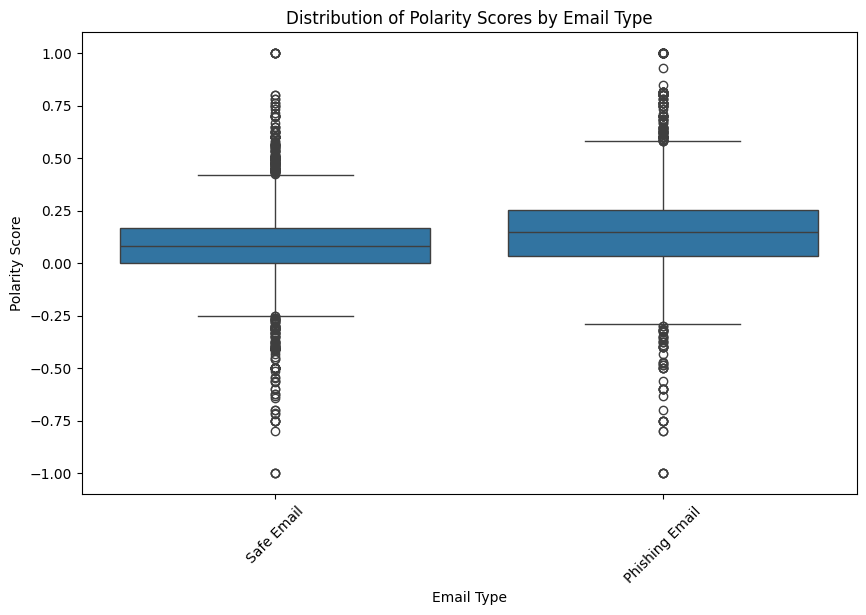

In [27]:
# Create boxplot of polarity scores by email type
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='type', y='polarity')
plt.title('Distribution of Polarity Scores by Email Type')
plt.xlabel('Email Type')
plt.ylabel('Polarity Score')
plt.xticks(rotation=45)
plt.show()


Topic 1: enron, 2001, hpl, subject, 2000, pm, attached, 713, gas, 000
Topic 2: ect, hou, vince, 2000, enron, cc, kaminski, subject, pm, forwarded
Topic 3: url, date, sep, 2002, thanks, latest, news, new, wed, says
Topic 4: linux, irish, maintainer, iluglinuxie, listmasterlinuxie, unsubscription, users, httpwwwlinuxiemailmanlistinfoilug, group, information
Topic 5: language, university, linguistics, papers, conference, languages, edu, english, 1998, linguistic
Topic 6: hourahead, hour, schedules, start, date, final, 02, iso, parsing, portland
Topic 7: mailing, list, sfnet, sponsored, wrote, spam, 2002, email, geek, heaven
Topic 8: money, business, company, time, software, like, save, need, make, want
Topic 9: com, http, www, html, net, php, info, mail, visit, site
Topic 10: click, free, email, removed, remove, receive, address, unsubscribe, offers, wish


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_1279/3048054531.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dominant_topic'] = dominant_topics


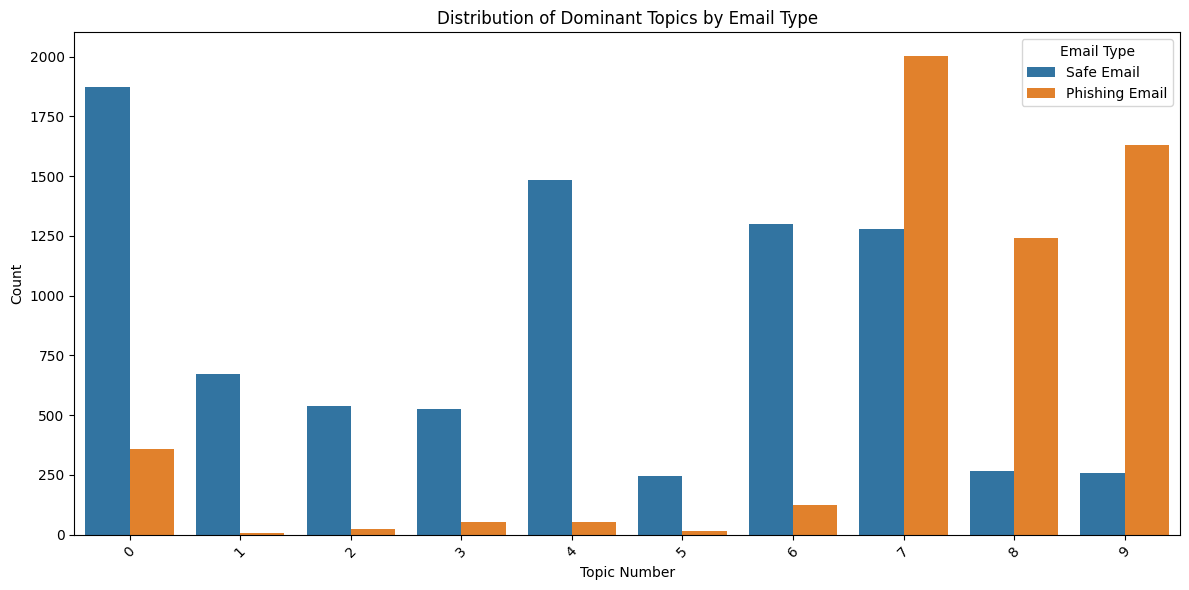

In [28]:
# Import required libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(filtered_df['clean_text'])

# Initialize and fit NMF model
n_topics = 10
nmf = NMF(n_components=n_topics, random_state=42)
nmf_output = nmf.fit_transform(tfidf_matrix)

# Get dominant topic for each document
dominant_topics = nmf_output.argmax(axis=1)
filtered_df['dominant_topic'] = dominant_topics

# Print top words for each topic
feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Create visualization of topic distribution by email type
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='dominant_topic', hue='type')
plt.title('Distribution of Dominant Topics by Email Type')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Email Type')
plt.tight_layout()
plt.show()


In [29]:
filtered_df['dominant_topic']

0        6
1        0
2        4
3        9
4        8
        ..
14915    9
14916    0
14917    4
14918    2
14919    6
Name: dominant_topic, Length: 13930, dtype: int64

In [30]:
filtered_df.columns

Index(['mail', 'type', 'word_length', 'clean_text', 'dollar_count',
       'exclamation_count', 'special_chars_count', 'has_link', 'has_phone',
       'has_email', 'diacritic_count', 'polarity', 'dominant_topic'],
      dtype='object')

Atleast we shall analyse Null values 

In [31]:
df[df.mail.isna()].type.value_counts()

type
Phishing Email    11
Name: count, dtype: int64

In [32]:
filtered_df['diacritic_count'].value_counts()

diacritic_count
0      13098
1        193
2        108
3         58
4         55
       ...  
35         1
113        1
418        1
181        1
45         1
Name: count, Length: 90, dtype: int64